# Local cohort validation

Imports

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from datetime import timedelta
from tqdm import tqdm
from coding_assets.python import xtra_viz

In [2]:
# declare paths
lm_rootdir = r"C:\Users\flori\OneDrive - univ-angers.fr\Documents\Home\Research\SPECTR\ISPECTR\data\2025\final_datasets\lemans\2025_12_24"

lm_full_dataset_path = os.path.join(lm_rootdir, "full_dataset.csv")
lm_predictions_path = os.path.join(r"C:\Users\flori\OneDrive - univ-angers.fr\Documents\Home\Research\SPECTR\ISPECTR\output\mednext_L_TEST2025",
                                   "validation_preds.npy")

Load data and preprocess

In [3]:
# load
lm_full_dataset = pd.read_csv(lm_full_dataset_path)
pred_array = np.load(lm_predictions_path)

C:\Users\flori\AppData\Local\Temp\ipykernel_38880\462045335.py:2: DtypeWarning: Columns (26,27,30,31,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  lm_full_dataset = pd.read_csv(lm_full_dataset_path)


In [4]:
print(f"{lm_full_dataset.shape=}")
print(f"{pred_array.shape=}")

lm_full_dataset.shape=(5846, 4025)
pred_array.shape=(1170, 5, 304)


Select only annotations from samples in the validation set

In [5]:
lm_test_dataset = lm_full_dataset[(lm_full_dataset.partition == "validation") & (~lm_full_dataset.exclude)].copy()
print(f"{lm_test_dataset.shape=}")

lm_test_dataset.shape=(1170, 4025)


Prepare variables, names, etc.

In [6]:
# isotype_map_dict = {'igg-lambda': 0,
#                     'igg-kappa': 1,
#                     'iga-lambda': 2,
#                     'iga-kappa': 3,
#                     'igm-lambda': 4,
#                     'igm-kappa': 5,
#                     'igg': 6,
#                     'iga': 7,
#                     'igm': 8,
#                     'kappa': 9,
#                     'lambda': 10}
#
# SIMPLE_CLASS_UNKNOWN = -1
# SIMPLE_CLASS_NEGATIVE = 0
# SIMPLE_CLASS_MONOCLONAL = 1
# SIMPLE_CLASS_BICLONAL = 2
#
# IG_FLAG_G = 2 ** 0  # 1
# IG_FLAG_A = 2 ** 1  # 2
# IG_FLAG_M = 2 ** 2  # 4
# IG_FLAG_K = 2 ** 3  # 8
# IG_FLAG_L = 2 ** 4  # 16
#
# def ig_class_from_concat_str(concat_str):
#     # variables that we will return
#     simple_class = SIMPLE_CLASS_UNKNOWN
#     # turn into a list of isotypes, e;g. "igg-lambda"
#     isotypes_list = eval(concat_str)
#     # convert this list of isotypes into numerical encoded isotypes; also helps checking all isotypes are known (i.e., expected values)
#     isotypes_list = [isotype_map_dict[e] for e in isotypes_list]
#     # turn into classes that we will be able to interpret
#     number_unique_isotypes = len(np.unique(isotypes_list))
#     if number_unique_isotypes == 0:
#         simple_class = SIMPLE_CLASS_NEGATIVE
#     elif number_unique_isotypes == 1:
#         simple_class = SIMPLE_CLASS_MONOCLONAL
#     else:
#         simple_class = SIMPLE_CLASS_BICLONAL
#     return simple_class
#
#
# def ig_str_to_flag(ig_str):
#     import re
#     if re.match("^ig[gam]-(kappa|lambda)$", ig_str) is not None:
#         heavy_ = {"g": IG_FLAG_G, "a": IG_FLAG_A, "m": IG_FLAG_M}[ig_str[2]]
#         if len(ig_str) == 9:
#             return heavy_ | IG_FLAG_K
#         else:
#             return heavy_ | IG_FLAG_L
#     if re.match("^ig[gam]$", ig_str) is not None:
#         heavy_ = {"g": IG_FLAG_G, "a": IG_FLAG_A, "m": IG_FLAG_M}[ig_str[2]]
#         return heavy_
#     if ig_str == "kappa":
#         return IG_FLAG_K
#     if ig_str == "lambda":
#         return IG_FLAG_L
#     raise Exception(f"unknown {ig_str=}")
#
#
# def ig_flag_from_concat_str(concat_str):
#     # variables that we will return
#     simple_class = SIMPLE_CLASS_UNKNOWN
#     # turn into a list of isotypes, e;g. "igg-lambda"
#     isotypes_list = eval(concat_str)
#     # convert this list of isotypes into numerical encoded isotypes; also helps checking all isotypes are known (i.e., expected values)
#     isotypes_flags = [ig_str_to_flag(e) for e in isotypes_list]
#     result_flag = 0
#     for flag in isotypes_flags:
#         result_flag |= flag
#     return result_flag
#
#
# def iso_n_to_text(iso_n):
#     if iso_n < 3:
#         return "Ig" + "GAM"[iso_n]
#     if iso_n == 3:
#         return "Kappa"
#     if iso_n == 4:
#         return "Lambda"
#     return "Unknown"

In [ ]:
# # prepare raw annotations
# sa_annotations["concat_chains"] = (sa_annotations["Heavy-Light Chain Pairs"] + sa_annotations["Unpaired Heavy Chains"] + sa_annotations["Unpaired Light Chains"]).str.replace("][", ",").str.replace(",,", ",").str.replace(",]", "]").str.replace("[,", "[")
# sa_annotations.loc[sa_annotations["concat_chains"].isna(), "concat_chains"] = "[]"
# # create 'simple' annotations
# sa_annotations["simple_annot_class"] = sa_annotations["concat_chains"].map(ig_class_from_concat_str)
# # create 'flag' annotations (detailed)
# sa_annotations["flag_class"] = sa_annotations["concat_chains"].map(ig_flag_from_concat_str)

In [ ]:
# # create simple annot
# lm_annotations["simple_annot_class"] = lm_annotations["Abnormality"].map({"Ig Gk": "Monoclonal", "Ig Gl": "Monoclonal", "Ig Ak": "Monoclonal", "Ig Al": "Monoclonal", "Ig Mk": "Monoclonal", "Ig Ml": "Monoclonal",
#                                                                           "Complex": "Biclonal",
#                                                                           "Normal": "Negative"})
# lm_annotations["simple_annot_class"] = lm_annotations["simple_annot_class"].map({"Monoclonal": 1, "Biclonal": 2, "Negative": 0})
# lm_annotations["reformat_annot"] = lm_annotations["Abnormality"].map({"Ig Gk": "IgG_Kappa", "Ig Gl": "IgG_Lambda", "Ig Ak": "IgA_Kappa", "Ig Al": "IgA_Lambda", "Ig Mk": "IgM_Kappa", "Ig Ml": "IgM_Lambda",
#                                                                       "Complex": "Biclonal",
#                                                                       "Normal": "Negative"})
#
# # create 1 0/1 binary variable per isotype
# lm_annotations["annot_bin_ok"] = lm_annotations["Abnormality"].isin(["Ig Gk", "Ig Gl", "Ig Ak", "Ig Al", "Ig Mk", "Ig Ml", "Normal"])
# lm_annotations["annot_g"] = lm_annotations["Abnormality"].isin(["Ig Gk", "Ig Gl"]) * 1
# lm_annotations["annot_a"] = lm_annotations["Abnormality"].isin(["Ig Ak", "Ig Al"]) * 1
# lm_annotations["annot_m"] = lm_annotations["Abnormality"].isin(["Ig Mk", "Ig Ml"]) * 1
# lm_annotations["annot_k"] = lm_annotations["Abnormality"].isin(["Ig Gk", "Ig Ak", "Ig Mk"]) * 1
# lm_annotations["annot_l"] = lm_annotations["Abnormality"].isin(["Ig Gl", "Ig Al", "Ig Ml"]) * 1

In [ ]:
# # convert ground truth to arrays
# gt_isotype_class = lm_test_dataset[[f"annot_{iso}" for iso in "gamkl"]].values
# gt_any_class = (gt_isotype_class.max(axis=1) >= 0.5) * 1
#
# # really simple for now => just see if an abnormality was detected in parallel in igg, iga, igm, kappa, and lambda
# # then
# pred_isotype_score = pred_array.max(axis=2)
# pred_any_score = pred_isotype_score.max(axis=1)
# pred_isotype_binary = (pred_isotype_score.astype(float) >= 0.5) * 1
# pred_any_binary = (pred_any_score >= 0.5) * 1

In [7]:
ci_level = .95

### HIGHEST PROBABILITY OF ABNORMALITY PER TRACE ROC-AUC: WITHOUT COMPLEX SAMPLES

ROC-AUC: max score for trace vs. ground truth class (after removing complex)

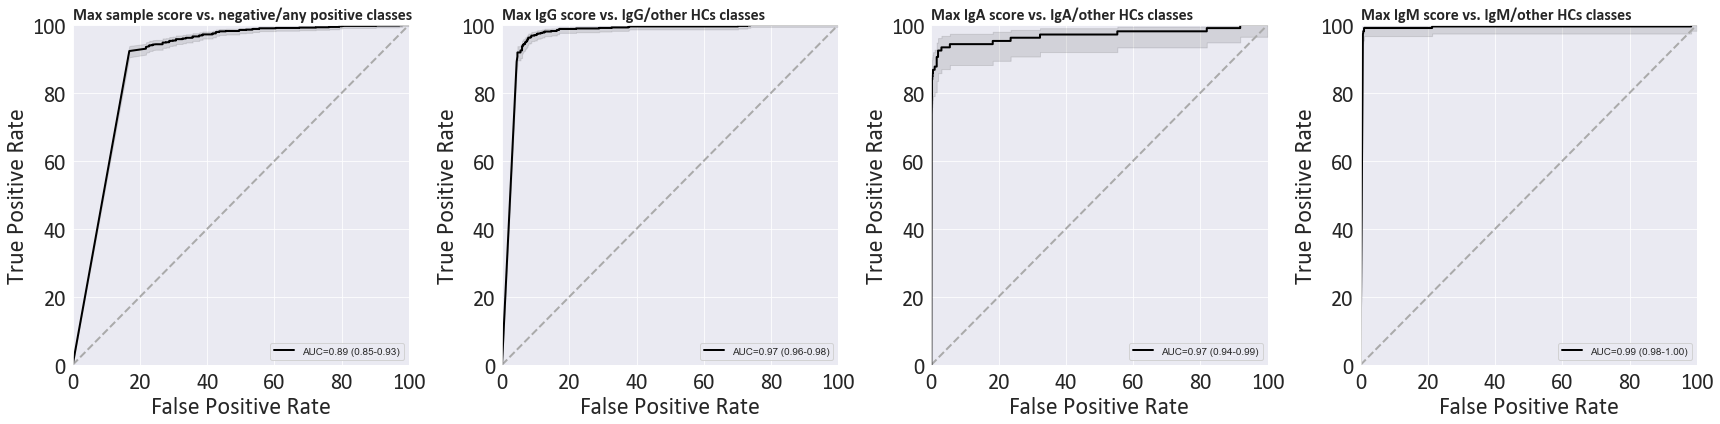

In [14]:
plt.figure(figsize=(xtra_viz.pp_size * 4, xtra_viz.pp_size * 1))

plt.subplot(1, 4, 1)
roc_gt = (lm_test_dataset[lm_test_dataset.annot_simple != "Complex/biclonal"].annot_simple != "Negative").values * 1
roc_pred = pred_array[np.where(lm_test_dataset.annot_simple != "Complex/biclonal")[0], :, :].max(axis=(1, 2))
xtra_viz.plot_roc(y=roc_gt, y_=roc_pred,
                  confidence_level=ci_level, suptitle=f"Max sample score vs. negative/any positive classes", suptitle_size=16)

for iso_index, iso_name in enumerate(["IgG", "IgA", "IgM"]):
    plt.subplot(1, 4, iso_index + 2)
    lm_test_dataset.annot_simple != "Complex/biclonal"
    roc_gt = (lm_test_dataset[lm_test_dataset.annot_simple != "Complex/biclonal"].annot_simple == iso_name).values * 1
    roc_pred = pred_array[np.where(lm_test_dataset.annot_simple != "Complex/biclonal")[0], iso_index, :].max(axis=1)
    xtra_viz.plot_roc(y=roc_gt, y_=roc_pred,
                      confidence_level=ci_level, suptitle=f"Max {iso_name} score vs. {iso_name}/other HCs classes", suptitle_size=16)
plt.tight_layout()
plt.show()

In [ ]:
lm_test_dataset.annot_complete.str.contains("IgG")

HIGHEST PROBABILITY OF ABNORMALITY PER TRACE ROC-AUC: WITH COMPLEX SAMPLES

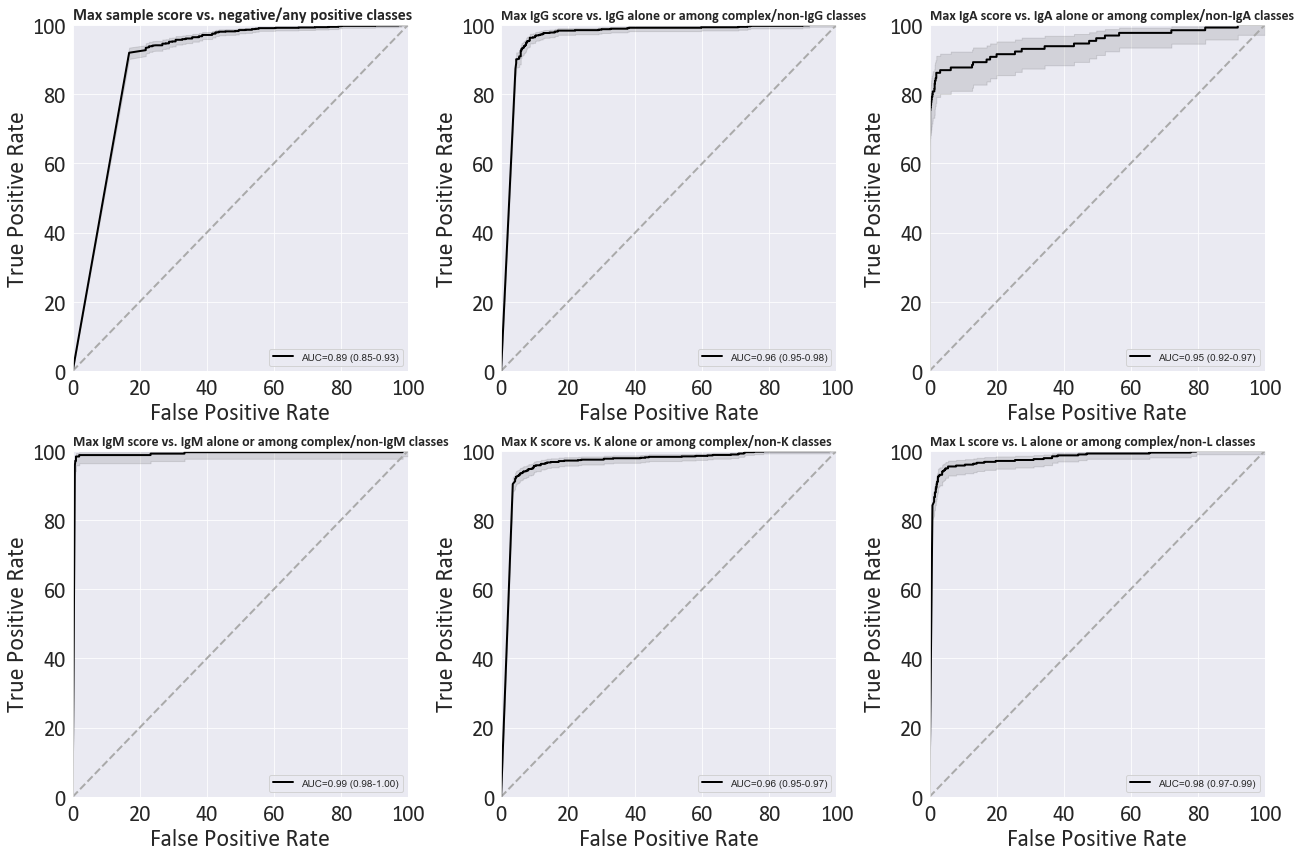

In [15]:
plt.figure(figsize=(xtra_viz.pp_size * 3, xtra_viz.pp_size * 2))

plt.subplot(2, 3, 1)
roc_gt = (lm_test_dataset.annot_simple != "Negative").values * 1
roc_pred = pred_array.max(axis=(1, 2))
xtra_viz.plot_roc(y=roc_gt, y_=roc_pred,
                  confidence_level=ci_level, suptitle=f"Max sample score vs. negative/any positive classes", suptitle_size=16)

for iso_index, iso_name in enumerate(["IgG", "IgA", "IgM", "K", "L"]):
    plt.subplot(2, 3, iso_index + 2)
    roc_gt = (lm_test_dataset.annot_complete.str.contains(iso_name)).values * 1
    roc_pred = pred_array[:, iso_index, :].max(axis=1)

    xtra_viz.plot_roc(y=roc_gt, y_=roc_pred,
                      confidence_level=ci_level, suptitle=f"Max {iso_name} score vs. {iso_name} alone or among complex/non-{iso_name} classes", suptitle_size=14)
plt.tight_layout()
plt.show()

In [ ]:
# # detect by biclonal/negative/monoclonal
# class_pred_df = pd.crosstab(pd.Series(lm_annotations.simple_annot_class.values, name="Ground truth").map({1: "Monoclonal", 2: "Biclonal", 0: "Negative"}),
#                             pd.Series(pred_any_binary, name="Predicted").map({1: "Positive", 0: "Negative"}))
# class_pred_df

In [ ]:
# 100 * class_pred_df / np.stack([class_pred_df.sum(axis=1).values, class_pred_df.sum(axis=1).values], axis=1)

## Convert post-processed prediction maps to classif ("IgG_kappa", etc.)

In [41]:
TYPE_FLAG_TO_STR_DICT = {1: "IgG", 2: "IgA", 4: "IgM", 8: "Kappa", 16: "Lambda",
                         9: "IgG_Kappa", 17: "IgG_Lambda",
                         10: "IgA_Kappa", 18: "IgA_Lambda",
                         12: "IgM_Kappa", 20: "IgM_Lambda"}


def read_predmap(sample_preds, POSITIVE_THRESHOLD=.5, MIN_DETECTION_CONFIDENCE=.5, MIN_CLASS_CONFIDENCE=.0, MIN_PEAK_SIZE=3,
                 EXPECTED_TYPES=(1, 2, 4, 8, 16, 1+8, 1+16, 2+8, 2+16, 4+8, 4+16)):
    abn_flag = 0
    output_class = "Negative"
    metadata = {"sizes": [], "types": [], "starts": [], "ends": []}
    # convert to binary/class maps
    b_heatmap = sample_preds.max(axis=0)
    c_predmap = ((sample_preds >= POSITIVE_THRESHOLD) * np.array([2 ** 0, 2 ** 1, 2 ** 2, 2 ** 3, 2 ** 4])[:, None]).sum(axis=0)
    b_predmap = (c_predmap > 0) * 1
    # check start and end are at zero, else something weird is happening
    assert b_predmap[0] == 0
    assert b_predmap[-1] == 0
    # find locators (0 vs any abnormality)
    diffmap = np.diff(b_predmap)
    abn_area_start_locators = np.where(diffmap == 1)[0] + 1
    abn_area_end_locators = np.where(diffmap == -1)[0] + 1
    assert len(abn_area_start_locators) == len(abn_area_end_locators)
    # calculate area of each map
    abn_area_sizes = abn_area_end_locators - abn_area_start_locators
    # determine value of each abnormal area (e.g. what is detected there)
    abn_area_types = []
    abn_area_type_confidence = []
    abn_area_detection_confidence = []
    if len(abn_area_sizes) > 0:
        # as soon as something is detected, set the abnormal flag to 1 (even if those abnormalities are removed afterwards)
        abn_flag = 1
        # for each area, determine type and confidence (i.e. % of points agreeing with this type)
        for area_i in np.arange(len(abn_area_sizes)):
            type_points = c_predmap[abn_area_start_locators[area_i]:abn_area_end_locators[area_i]]
            preferred_type = np.median(type_points)
            type_confidence = (type_points == preferred_type).sum() / len(type_points)
            detection_confidence = np.mean(b_heatmap[abn_area_start_locators[area_i]:abn_area_end_locators[area_i]])
            abn_area_types.append(preferred_type)
            abn_area_type_confidence.append(type_confidence)
            abn_area_detection_confidence.append(detection_confidence)
        # merge
        abn_area_types = np.array(abn_area_types).astype(int)
        abn_area_type_confidence = np.array(abn_area_type_confidence)
        abn_area_detection_confidence = np.array(abn_area_detection_confidence)
        # post-process detected abnormal areas
        keep_abn_area_filter = np.array([True, ] * len(abn_area_sizes))
        # filter out if too small
        keep_abn_area_filter = np.logical_and(keep_abn_area_filter, abn_area_sizes >= MIN_PEAK_SIZE)
        # filter out if classification confidence too small
        keep_abn_area_filter = np.logical_and(keep_abn_area_filter, abn_area_type_confidence >= MIN_CLASS_CONFIDENCE)
        # filter out if detection confidence too small
        keep_abn_area_filter = np.logical_and(keep_abn_area_filter, abn_area_detection_confidence >= MIN_DETECTION_CONFIDENCE)
        # filter out unexpected types
        keep_abn_area_filter = np.logical_and(keep_abn_area_filter, np.isin(abn_area_types, EXPECTED_TYPES))
        # filter out effectively and convert
        abn_area_types_filtered = abn_area_types[keep_abn_area_filter]
        if len(abn_area_types_filtered) > 0:
            if len(np.unique(abn_area_types_filtered)) > 1:
                output_class = "Complex/biclonal"
            else:
                output_class = TYPE_FLAG_TO_STR_DICT[abn_area_types_filtered[0]]
        # fill metadata for graphs later
        metadata["types"] = abn_area_types[keep_abn_area_filter]
        metadata["starts"] = abn_area_start_locators[keep_abn_area_filter]
        metadata["ends"] = abn_area_end_locators[keep_abn_area_filter]
        metadata["sizes"] = abn_area_sizes[keep_abn_area_filter]
    for key in ("types", "starts", "ends", "sizes"):
        metadata[key] = np.array(metadata[key])
    return output_class, abn_flag, metadata

In [42]:
pred_classes, pred_flags, pred_metadata = [], [], []
for index in tqdm(range(len(pred_array))):
    pred_class, pred_flag, pred_mt = read_predmap(sample_preds=pred_array[index, ...])
    pred_classes.append(pred_class)
    pred_flags.append(pred_flag)
    pred_metadata.append(pred_mt)

100%|██████████| 1170/1170 [00:00<00:00, 15032.93it/s]


Create tables

In [89]:
def annotation_complete_to_simple(s):
    if s == 'Negative':
        return s
    if s.startswith('LC_'):
        return s[3:]
    if s.startswith('Ig'):
        return s
    return 'Complex/biclonal'

In [105]:
pred_classes_series = pd.Series(pred_classes, name="Predicted")
grountruth_classes_series = pd.Series(lm_test_dataset.annot_complete.str.replace("K", "Kappa").str.replace("L", "Lambda").apply(annotation_complete_to_simple).values, name="Labeled")
classes_crosstab = pd.crosstab(grountruth_classes_series, pred_classes_series)

final_columns_order = ['IgG', 'IgG_Kappa', 'IgG_Lambda',
                       'IgA', 'IgA_Kappa', 'IgA_Lambda',
                       'IgM', 'IgM_Kappa', 'IgM_Lambda',
                       'Kappa', 'Lambda', 'Complex/biclonal', 'Negative']
classes_crosstab = classes_crosstab[[c for c in final_columns_order if c in classes_crosstab.columns]]
classes_crosstab = classes_crosstab.iloc[[np.where(classes_crosstab.index == c)[0][0] for c in final_columns_order if c in classes_crosstab.index], :]
classes_crosstab = pd.concat([classes_crosstab, classes_crosstab.sum(axis=1).rename("Total")], axis=1)

In [106]:
classes_crosstab

,IgG,IgG_Kappa,IgG_Lambda,IgA,IgA_Kappa,IgA_Lambda,IgM_Kappa,IgM_Lambda,Kappa,Lambda,Complex/biclonal,Negative,Total
Labeled,,,,,,,,,,,,,
IgG_Kappa,0,414,2,0,0,1,3,0,1,0,4,17,442
IgG_Lambda,2,3,211,0,0,0,1,1,1,1,2,2,224
IgA_Kappa,0,1,0,0,51,1,0,0,0,0,1,6,60
IgA_Lambda,0,2,0,1,0,39,0,0,0,0,0,4,46
IgM_Kappa,0,0,0,0,0,0,172,0,0,0,1,0,173
IgM_Lambda,0,0,2,0,0,0,0,42,0,0,1,0,45
Complex/biclonal,0,17,14,0,4,2,8,2,0,1,28,3,79
Negative,1,18,7,0,6,2,3,1,2,0,0,61,101


Let's merge all IgGs/As/Ms together, independently from the light chain

In [107]:
def remap_classes_func(s):
    if s in ("Negative", "Complex/biclonal"):
        return s
    if s[:2].startswith("Ig"):
        return s[:3]
    return "LC"

classes_crosstab_simple = pd.crosstab(grountruth_classes_series.map(remap_classes_func), pred_classes_series.map(remap_classes_func))
final_columns_order_simple = ['IgG', 'IgA', 'IgM', 'LC', 'Complex/biclonal', 'Negative']
classes_crosstab_simple = classes_crosstab_simple[[c for c in final_columns_order_simple if c in classes_crosstab_simple.columns]]
classes_crosstab_simple = classes_crosstab_simple.iloc[[np.where(classes_crosstab_simple.index == c)[0][0] for c in final_columns_order_simple if c in classes_crosstab_simple.index], :]
classes_crosstab_simple = pd.concat([classes_crosstab_simple, classes_crosstab_simple.sum(axis=1).rename("Total")], axis=1)

In [108]:
classes_crosstab_simple

,IgG,IgA,IgM,LC,Complex/biclonal,Negative,Total
Labeled,,,,,,,
IgG,632,1,5,3,6,19,666
IgA,3,92,0,0,1,10,106
IgM,2,0,214,0,2,0,218
Complex/biclonal,31,6,10,1,28,3,79
Negative,26,8,4,2,0,61,101


Also display in percentage

In [109]:
classes_crosstab_pct = (100 * classes_crosstab / classes_crosstab["Total"].values[:, None]).round(1)
classes_crosstab_pct_simple = (100 * classes_crosstab_simple / classes_crosstab_simple["Total"].values[:, None]).round(1)

In [110]:
classes_crosstab_pct

,IgG,IgG_Kappa,IgG_Lambda,IgA,IgA_Kappa,IgA_Lambda,IgM_Kappa,IgM_Lambda,Kappa,Lambda,Complex/biclonal,Negative,Total
Labeled,,,,,,,,,,,,,
IgG_Kappa,0.0,93.7,0.5,0.0,0.0,0.2,0.7,0.0,0.2,0.0,0.9,3.8,100.0
IgG_Lambda,0.9,1.3,94.2,0.0,0.0,0.0,0.4,0.4,0.4,0.4,0.9,0.9,100.0
IgA_Kappa,0.0,1.7,0.0,0.0,85.0,1.7,0.0,0.0,0.0,0.0,1.7,10.0,100.0
IgA_Lambda,0.0,4.3,0.0,2.2,0.0,84.8,0.0,0.0,0.0,0.0,0.0,8.7,100.0
IgM_Kappa,0.0,0.0,0.0,0.0,0.0,0.0,99.4,0.0,0.0,0.0,0.6,0.0,100.0
IgM_Lambda,0.0,0.0,4.4,0.0,0.0,0.0,0.0,93.3,0.0,0.0,2.2,0.0,100.0
Complex/biclonal,0.0,21.5,17.7,0.0,5.1,2.5,10.1,2.5,0.0,1.3,35.4,3.8,100.0
Negative,1.0,17.8,6.9,0.0,5.9,2.0,3.0,1.0,2.0,0.0,0.0,60.4,100.0


In [111]:
classes_crosstab_pct_simple

,IgG,IgA,IgM,LC,Complex/biclonal,Negative,Total
Labeled,,,,,,,
IgG,94.9,0.2,0.8,0.5,0.9,2.9,100.0
IgA,2.8,86.8,0.0,0.0,0.9,9.4,100.0
IgM,0.9,0.0,98.2,0.0,0.9,0.0,100.0
Complex/biclonal,39.2,7.6,12.7,1.3,35.4,3.8,100.0
Negative,25.7,7.9,4.0,2.0,0.0,60.4,100.0


Finally display "pretty" tables with raw n + percentages

In [112]:
classes_crosstab.astype(str) + " (" + classes_crosstab_pct.astype(str) + "%)"

,IgG,IgG_Kappa,IgG_Lambda,IgA,IgA_Kappa,IgA_Lambda,IgM_Kappa,IgM_Lambda,Kappa,Lambda,Complex/biclonal,Negative,Total
Labeled,,,,,,,,,,,,,
IgG_Kappa,0 (0.0%),414 (93.7%),2 (0.5%),0 (0.0%),0 (0.0%),1 (0.2%),3 (0.7%),0 (0.0%),1 (0.2%),0 (0.0%),4 (0.9%),17 (3.8%),442 (100.0%)
IgG_Lambda,2 (0.9%),3 (1.3%),211 (94.2%),0 (0.0%),0 (0.0%),0 (0.0%),1 (0.4%),1 (0.4%),1 (0.4%),1 (0.4%),2 (0.9%),2 (0.9%),224 (100.0%)
IgA_Kappa,0 (0.0%),1 (1.7%),0 (0.0%),0 (0.0%),51 (85.0%),1 (1.7%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),1 (1.7%),6 (10.0%),60 (100.0%)
IgA_Lambda,0 (0.0%),2 (4.3%),0 (0.0%),1 (2.2%),0 (0.0%),39 (84.8%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),4 (8.7%),46 (100.0%)
IgM_Kappa,0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),172 (99.4%),0 (0.0%),0 (0.0%),0 (0.0%),1 (0.6%),0 (0.0%),173 (100.0%)
IgM_Lambda,0 (0.0%),0 (0.0%),2 (4.4%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),42 (93.3%),0 (0.0%),0 (0.0%),1 (2.2%),0 (0.0%),45 (100.0%)
Complex/biclonal,0 (0.0%),17 (21.5%),14 (17.7%),0 (0.0%),4 (5.1%),2 (2.5%),8 (10.1%),2 (2.5%),0 (0.0%),1 (1.3%),28 (35.4%),3 (3.8%),79 (100.0%)
Negative,1 (1.0%),18 (17.8%),7 (6.9%),0 (0.0%),6 (5.9%),2 (2.0%),3 (3.0%),1 (1.0%),2 (2.0%),0 (0.0%),0 (0.0%),61 (60.4%),101 (100.0%)


In [113]:
classes_crosstab_simple.astype(str) + " (" + classes_crosstab_pct_simple.astype(str) + "%)"

,IgG,IgA,IgM,LC,Complex/biclonal,Negative,Total
Labeled,,,,,,,
IgG,632 (94.9%),1 (0.2%),5 (0.8%),3 (0.5%),6 (0.9%),19 (2.9%),666 (100.0%)
IgA,3 (2.8%),92 (86.8%),0 (0.0%),0 (0.0%),1 (0.9%),10 (9.4%),106 (100.0%)
IgM,2 (0.9%),0 (0.0%),214 (98.2%),0 (0.0%),2 (0.9%),0 (0.0%),218 (100.0%)
Complex/biclonal,31 (39.2%),6 (7.6%),10 (12.7%),1 (1.3%),28 (35.4%),3 (3.8%),79 (100.0%)
Negative,26 (25.7%),8 (7.9%),4 (4.0%),2 (2.0%),0 (0.0%),61 (60.4%),101 (100.0%)


Look at some examples of samples that were not predicted the correct class

In [114]:
np.where(grountruth_classes_series.values != pred_classes_series.values)[0]

array([   1,   12,   13,   27,   33,   58,   67,   73,   75,   92,   93,
         99,  133,  134,  143,  156,  158,  159,  162,  164,  174,  185,
        188,  190,  191,  214,  236,  247,  264,  266,  279,  286,  291,
        319,  324,  325,  328,  332,  336,  345,  365,  367,  368,  373,
        379,  381,  387,  393,  399,  400,  417,  418,  423,  440,  448,
        458,  461,  463,  471,  482,  489,  491,  494,  496,  497,  503,
        514,  520,  525,  561,  564,  566,  572,  606,  611,  612,  615,
        616,  629,  636,  639,  667,  670,  680,  684,  692,  699,  706,
        716,  727,  730,  731,  734,  740,  759,  781,  782,  783,  795,
        797,  802,  805,  819,  824,  840,  841,  849,  850,  854,  855,
        857,  858,  862,  868,  870,  876,  880,  886,  887,  889,  891,
        908,  914,  925,  926,  930,  943,  955,  956,  964,  981,  982,
        988,  998, 1008, 1014, 1028, 1031, 1041, 1070, 1076, 1086, 1114,
       1116, 1117, 1119, 1127, 1128, 1136, 1147, 11

Function to display a sample's traces and predictions

In [78]:
# a function for plotting
def plot_it(idx, sample_x, sample_pred, gt_text, pred_text, pred_meta, debug):
    from coding_assets.python import xtra_viz
    plt.figure(figsize=(xtra_viz.pp_size * 3, xtra_viz.pp_size * 3))
    for num, lab in enumerate(['Ref', 'IgG', 'IgA', 'IgM', 'Kappa', 'Lambda']):
        num_pred = num - 1
        trace_label = lab + " trace"
        plt.subplot(6, 1, num + 1)
        if num_pred >= 0:
            tmp_df = pd.DataFrame({"x": np.concatenate([np.arange(len(sample_x)), np.arange(sample_pred.shape[1])]),
                                   lab: np.concatenate([sample_x[:, num], sample_pred[num_pred, :]]),
                                   trace_label: np.concatenate([["Input", ] * len(sample_x), ["Predicted", ] * sample_pred.shape[1]])})
        else:
            tmp_df = pd.DataFrame({"x": np.arange(len(sample_x)),
                                   lab: sample_x[:, num],
                                   trace_label: np.array(["Input", ] * len(sample_x))})
        sns.lineplot(data=tmp_df, x="x", y=lab, hue=trace_label)
        if num_pred >= 0:
            for p_type, p_start, p_end in zip(pred_meta["types"], pred_meta["starts"], pred_meta["ends"]):
                if ((p_type | (2 ** num_pred)) == p_type):
                    plt.fill_between(x=np.arange(p_start, p_end+1),
                                     y1=[0, ] * (p_end - p_start + 1),
                                     y2=sample_x[p_start:(p_end+1), num],
                                     color="red")
        if num == 0:
            plt.title(f'Trace {idx=}, labeled: {gt_text}, predicted: {pred_text}')

    plt.tight_layout()
    if debug != "inline":
        plt.savefig(os.path.join(debug, f"pred_plot_{idx=}.png"))
        plt.close()
    else:
        plt.show()

In [79]:
x_array = np.stack([lm_test_dataset.loc[:, [f'{trace}_{x+1}' for x in np.arange(304)]].values for trace in ['ELP', 'IgG', 'IgA', 'IgM', 'K', 'L']],
                  axis=-1)

In [80]:
def plot_it_short(index):
    plot_it(idx=index, sample_x=x_array[index, ...], sample_pred=pred_array[index, ...],
            gt_text=grountruth_classes_series.iloc[index], pred_text=pred_classes_series.iloc[index],
            pred_meta=pred_metadata[index], debug="inline")

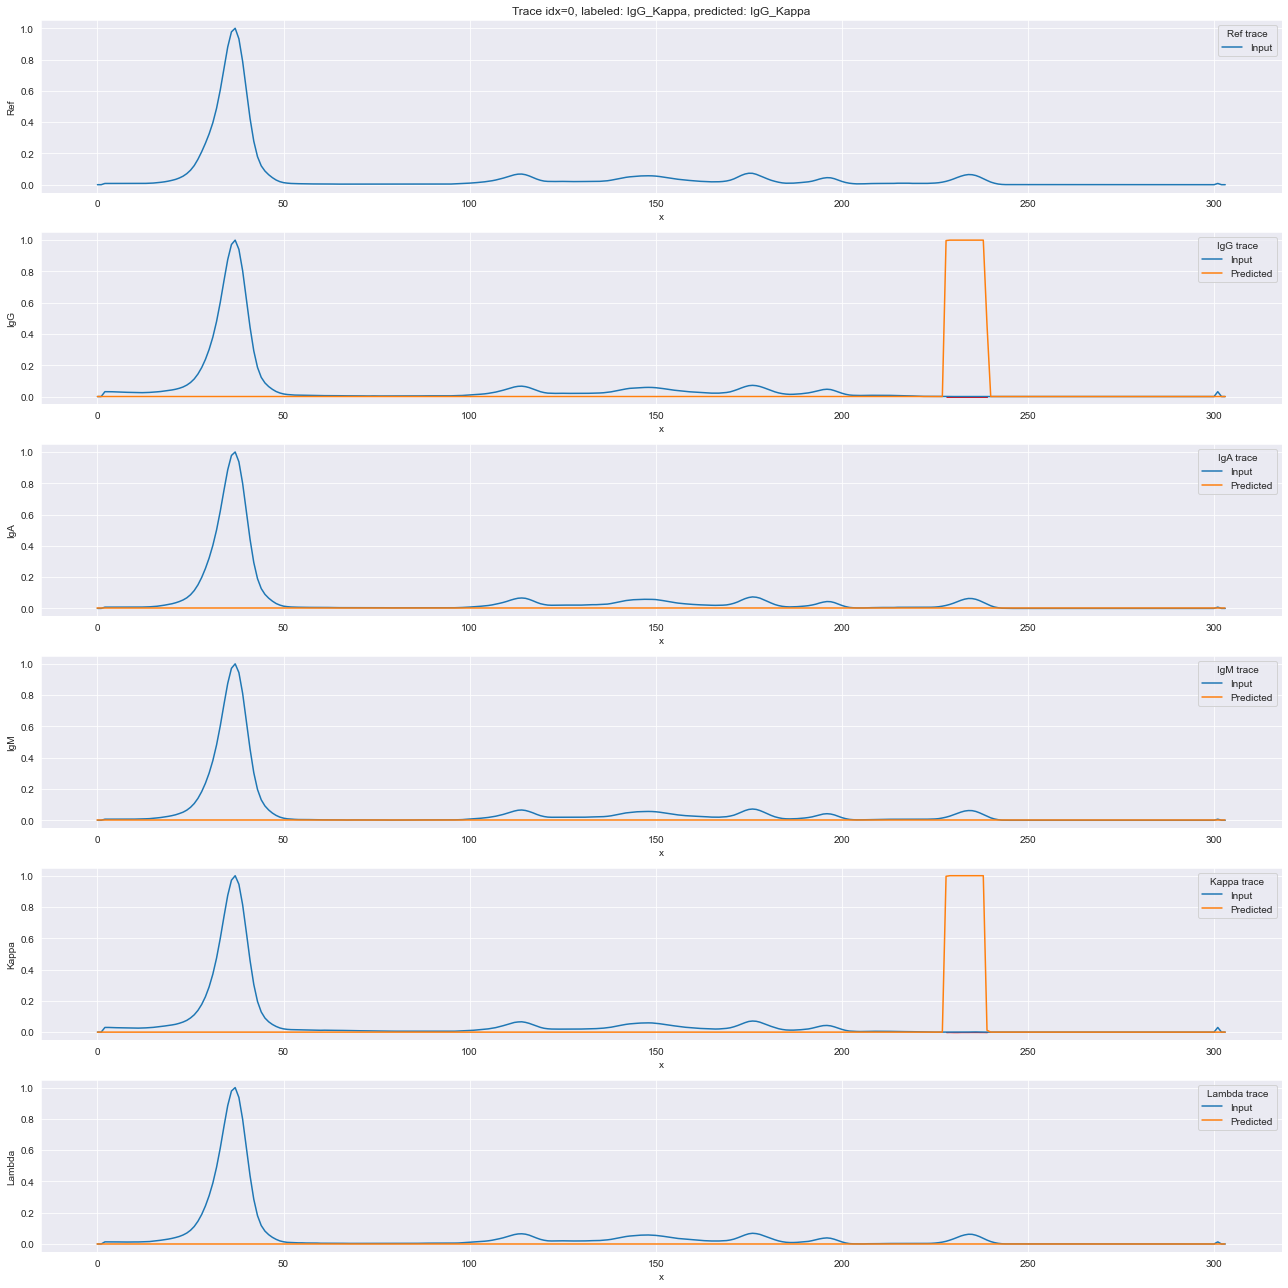

In [115]:
plot_it_short(0)

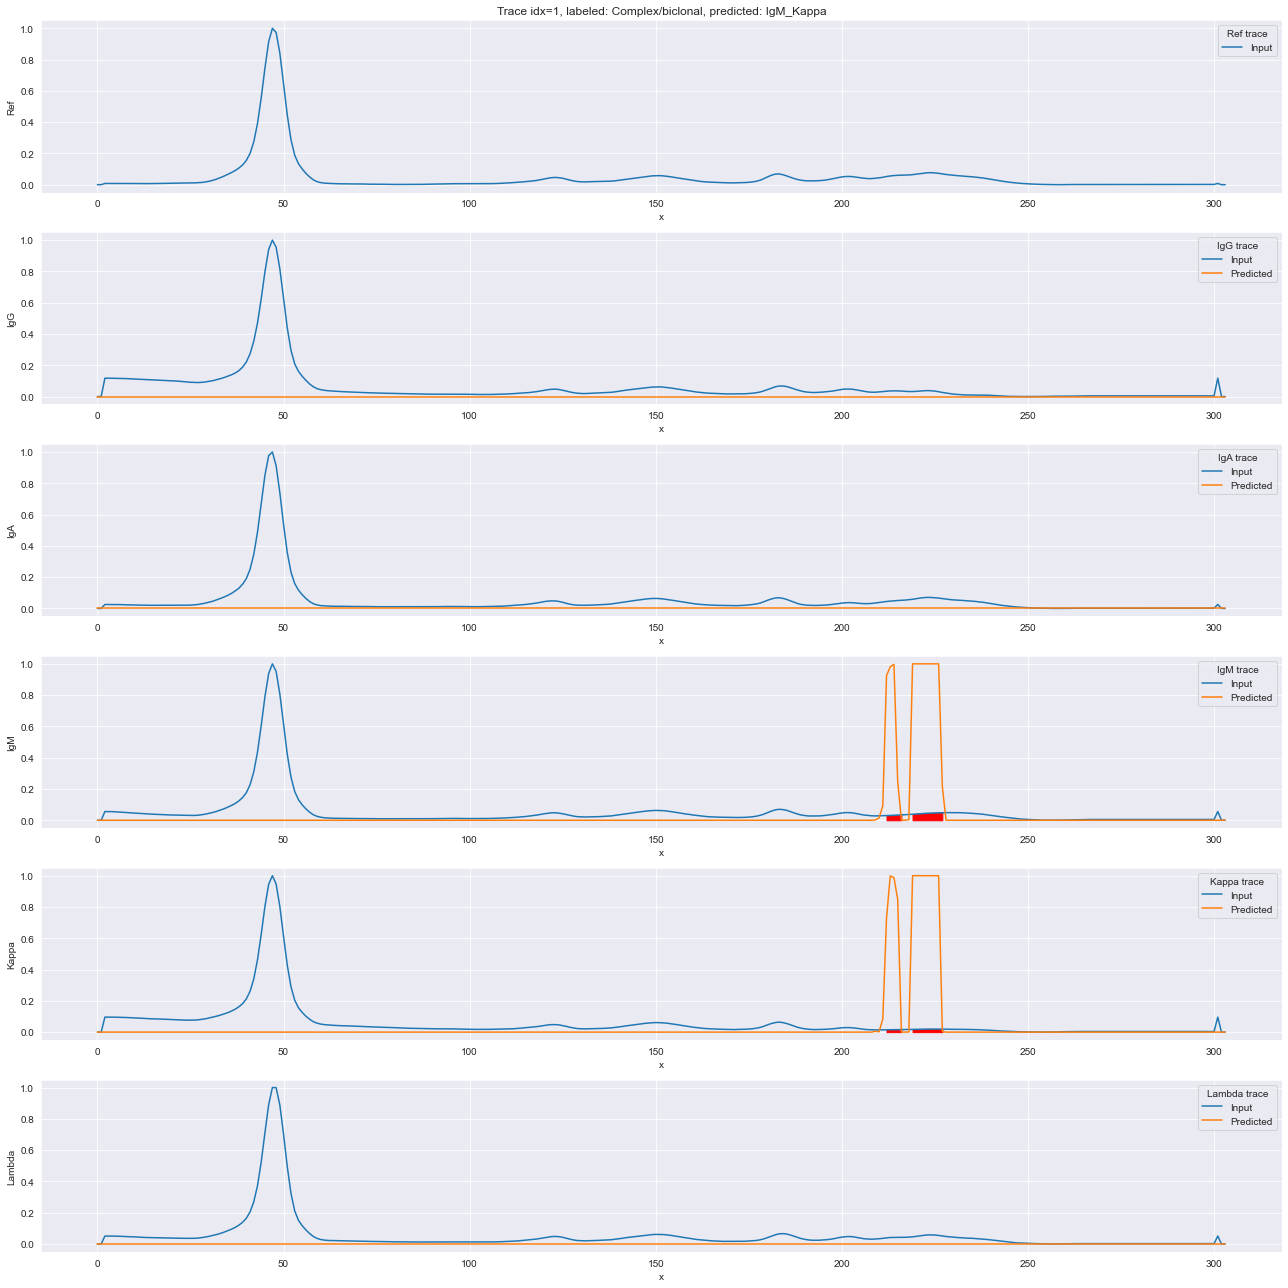

In [117]:
plot_it_short(1)